In [1]:
"""
Landon Buell
PHYS 799
Feature Space Figures
28 Nov 2020
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gds
import os
import pandas as pd

In [2]:
def FeatureSpace2D(X1,X2,X_bnd,Y_bnd,nameSave):
    """ Plot X1 & X2 in Feature Space """    
    fig = plt.figure(figsize=(20,12))
    plt.tight_layout()
    grid = fig.add_gridspec(6,6)
    
    figMain = fig.add_subplot(grid[1:5,0:5])
    figMain.plot(X1[0],X1[1],color='purple',marker='o',markersize=6,linestyle="",label="Class A")
    figMain.plot(X2[0],X2[1],color='orange',marker='s',markersize=6,linestyle="",label="Class B")
    
    figMain.plot(X_bnd,Y_bnd,color='red',linestyle="--",label="Decision Boundary")
    
    figMain.hlines(0,0,1,color='black')
    figMain.vlines(0,0,1,color='black')
    
    plt.xlim((-0.05,+1.05))
    plt.ylim((-0.05,+1.05))
    
    plt.xlabel("Feature 1",size=40,weight='bold')
    plt.ylabel("Feature 2",size=40,weight='bold')
    
    figMain.legend(fontsize=20,loc="upper right",facecolor='gray',framealpha=1.0)
    
    figMain.set_yticks(np.arange(0,1.1,0.1))
    figMain.set_yticklabels([])
    figMain.set_xticks(np.arange(0,1.1,0.1))
    figMain.set_xticklabels([])
    figMain.grid()
    
    figTop = fig.add_subplot(grid[0,0:5],sharex=figMain)
    figTop.boxplot((X1[0],X2[0]),showfliers=False,vert=False,widths=0.6)
    figTop.set_yticklabels([])
    plt.ylabel("Feature 1 \nBox Plots",size=20,weight='bold')
    figTop.grid()
    
    figRight = fig.add_subplot(grid[1:5,-1],sharey=figMain) 
    figRight.boxplot((X1[1],X2[1]),showfliers=False,vert=True,widths=0.6)
    figRight.set_xticklabels([])
    plt.xlabel("Feature 2 \nBox Plots",size=20,weight='bold')
    figRight.grid()

    plt.savefig(nameSave+".png")
    plt.show()

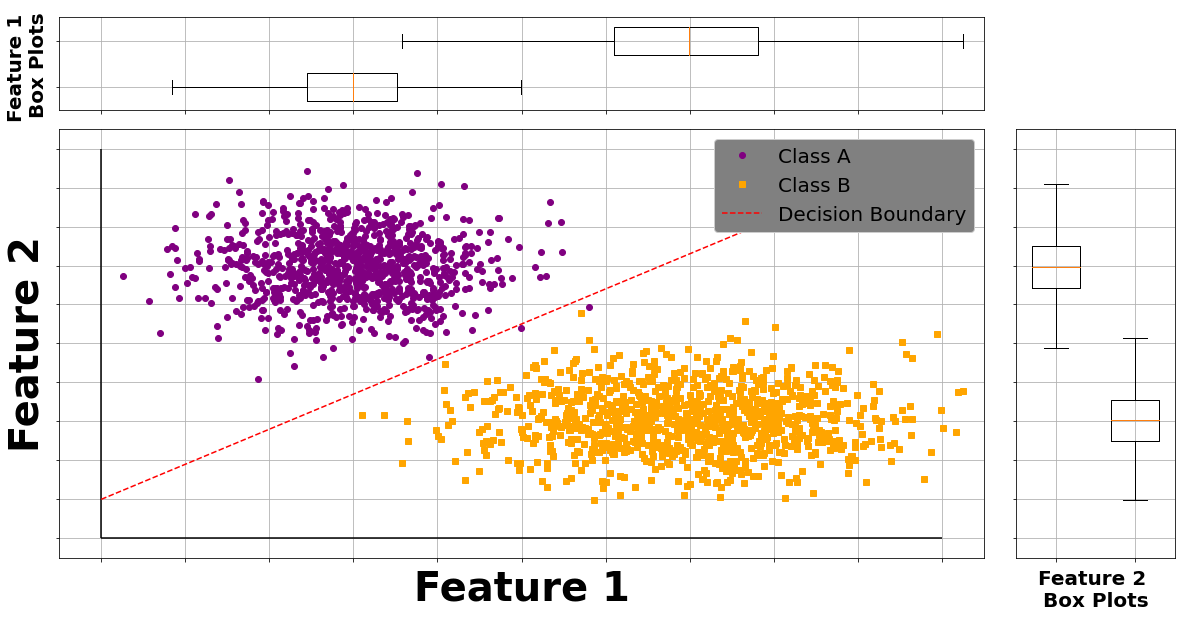

In [3]:
# Generate set of features w/ clear decision boundary

xVals = np.arange(0,1.1,0.1)
decisionBoundary = xVals*0.9 + 0.1

classC_x = np.random.normal(loc=0.3,scale=0.08,size=1000)
classC_y = np.random.normal(loc=0.7,scale=0.08,size=1000)
ClassC = np.array([classC_x,classC_y])

classD_x = np.random.normal(loc=0.7,scale=0.12,size=1000)
classD_y = np.random.normal(loc=0.3,scale=0.08,size=1000)
ClassD = np.array([classD_x,classD_y])

FeatureSpace2D(ClassC,ClassD,xVals,decisionBoundary,"LinearSeparable2")

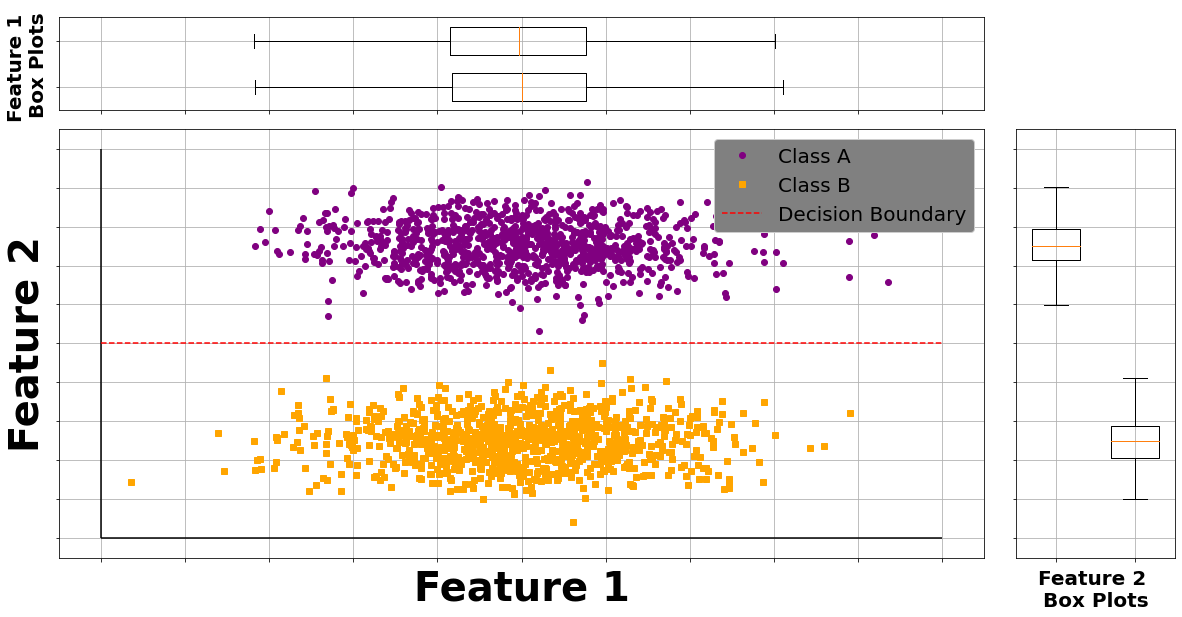

In [33]:
# Generate set of features w/ clear decision boundary

decisionBoundary = np.ones(shape=(11))*0.5

classA_x = np.random.normal(loc=0.50,scale=0.12,size=1000)
classA_y = np.random.normal(loc=0.75,scale=0.06,size=1000)
ClassA = np.array([classA_x,classA_y])

classB_x = np.random.normal(loc=0.50,scale=0.12,size=1000)
classB_y = np.random.normal(loc=0.25,scale=0.06,size=1000)
ClassB = np.array([classB_x,classB_y])

FeatureSpace2D(ClassA,ClassB,xVals,decisionBoundary,"LinearSeparable1")

c:\users\landon\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\landon\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


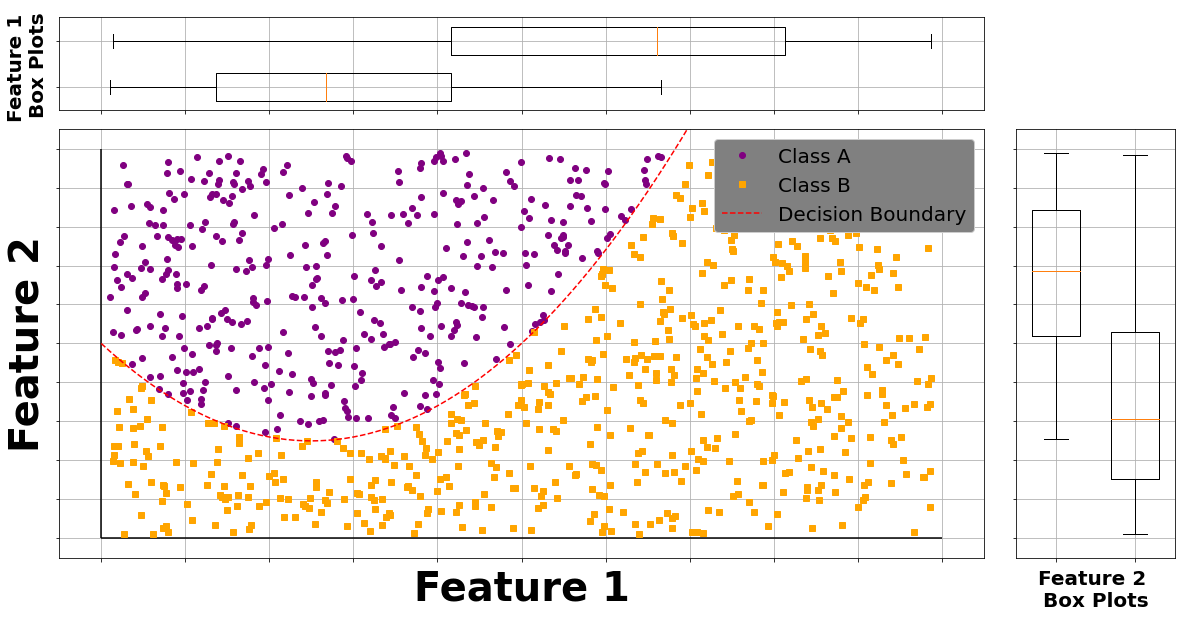

In [34]:
# Generate set of features w/ clear decision boundary

classE_x = np.array([])
classE_y = np.array([])
classF_x = np.array([])
classF_y = np.array([])

xVals = np.arange(0,1.1,0.01)
#bounds = lambda x : np.log(x+0.4)+0.6
bounds = lambda x : 4*x**2 - 2 * x + 0.5
decisionBoundary = bounds(xVals)

randomVals = np.random.uniform(0.01,0.99,size=(2,1000))
for (x,y) in zip(randomVals[0],randomVals[1]):
    if y > bounds(x):    # 'above' bounds
        classE_x = np.append(classE_x,x)
        classE_y = np.append(classE_y,y)
    else:
        classF_x = np.append(classF_x,x)
        classF_y = np.append(classF_y,y)

ClassE = np.array([classE_x,classE_y])
ClassF = np.array([classF_x,classF_y])

FeatureSpace2D(ClassE,ClassF,xVals,decisionBoundary,"QuadraticSeparable")

c:\users\landon\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\landon\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


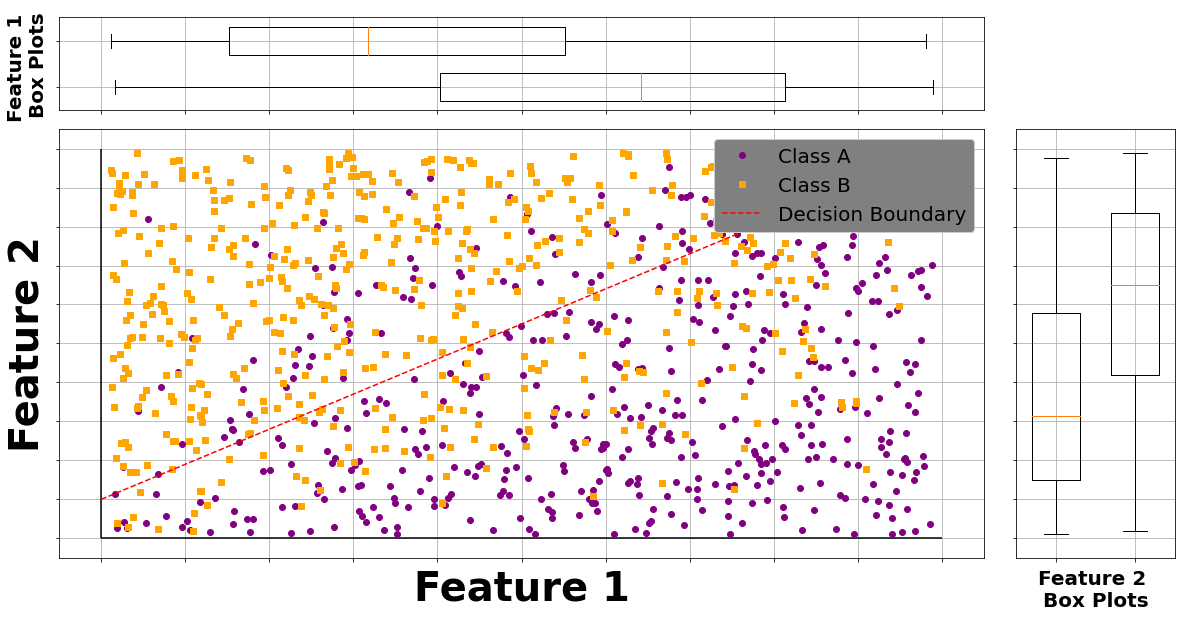

In [35]:
# Generate set of features w/ clear decision boundary

classG_x = np.array([])
classG_y = np.array([])
classH_x = np.array([])
classH_y = np.array([])

xVals = np.arange(0,1.1,0.1)
decisionBoundary = xVals*0.9 + 0.1

randomVals = np.random.uniform(0.01,0.99,size=(2,1000))
for (x,y) in zip(randomVals[0],randomVals[1]):
    _num = np.array([x*(1-y**2),(1-x**2)*y])
    _den = np.sum(_num)
    probs = _num / _den
    _bin = np.random.choice([True,False],p=probs)
    if _bin == True:
        classG_x = np.append(classG_x,x)
        classG_y = np.append(classG_y,y)
    else:
        classH_x = np.append(classH_x,x)
        classH_y = np.append(classH_y,y)

ClassG = np.array([classG_x,classG_y])
ClassH = np.array([classH_x,classH_y])

FeatureSpace2D(ClassG,ClassH,xVals,decisionBoundary,"LinearNonSeparable")